In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def DFT(fn):
  
  M = len(fn)
  Fm = np.zeros(M, dtype=complex)
  
  for m in range(M):
    for n in range(M):
      Fm[m] += fn[n]*np.exp(-2*np.pi*1j*m*n/M)
      
  return Fm

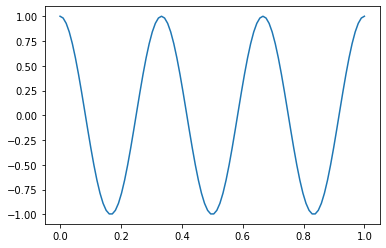

In [19]:
frequency = 3.

x = np.linspace(0, 1, 100)
y = np.cos(2*np.pi*frequency*x)
_ = plt.plot(x, y)

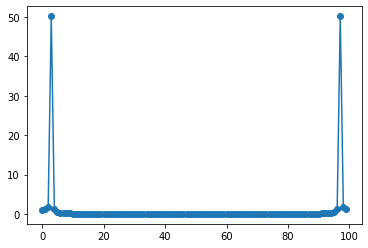

In [20]:
Fy = DFT(y)

_ = plt.plot( np.abs(Fy), "-o")

In [21]:
def DFT_frequency(x):
  
  M = len(x)
  delta_x = x[1] - x[0]
  f_max = 1 / (2*delta_x)
  f_interval = 2 * f_max
  delta_f = f_interval / M
  
  if M%2 == 0:
    half_M = M // 2
    negative_frequencies = np.arange(-half_M, 0) * delta_f
    positive_frequencies = np.arange(0, half_M) * delta_f
  else:
    half_M = (M -1) // 2
    negative_frequencies = np.arange(-half_M, 0) * delta_f
    positive_frequencies = np.arange(0, half_M + 1) * delta_f
    
  
  frequencies = np.concatenate((positive_frequencies, negative_frequencies))
  
  return frequencies

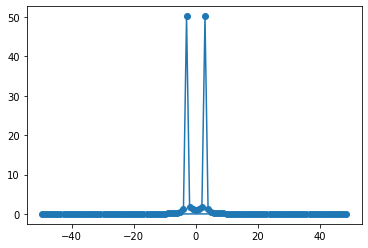

In [23]:
frequency = 3.

x = np.linspace(0, 1, 100)
y = np.cos(2*np.pi*frequency*x)
Fy = DFT(y)
freqs = DFT_frequency(x)


_ = plt.plot(freqs, np.abs(Fy),  '-o')

In [24]:
def DFT_np(fn):
  M = len(fn)
  n_array = np.tile(range(M), reps=(M, 1))
  m_array = np.arange(M).reshape(M, 1)
  indices = n_array*m_array
  
  coef_matrix = np.exp(-2*np.pi*1j*indices / M)
  Fm = np.dot(coef_matrix, fn)  
  
  return Fm

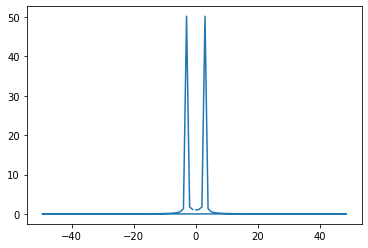

In [26]:
from scipy.fftpack import fft, fftfreq, fftshift

Fy_scipy = fft(y)
freqs_scipy = fftfreq(len(x), x[1]-x[0])
plt.plot(freqs_scipy, np.abs(Fy_scipy))

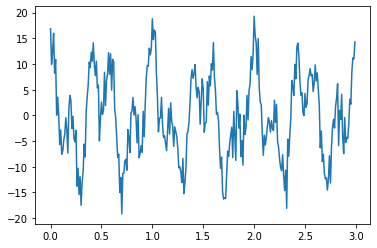

In [27]:
freq1 = 2. 
freq2 = 5.

x = np.arange(0, 3, 0.01)
y = 8 * np.cos(2 * np.pi * freq1 * x) + 7 * np.cos(2*np.pi * freq2 * x)
y += 3 * np.random.normal(0., 1., x.size)

_ = plt.plot(x, y) 

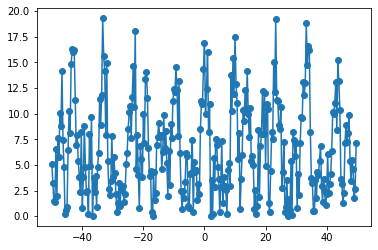

In [33]:
Fy = fft(y)
freqs = fftfreq(len(x), x[1]-x[0])
freqs = fftshift(freqs)
Fy = fftshift(y)

plt.plot(freqs, np.abs(Fy), '-o')
# plt.xlim((-8, 8))

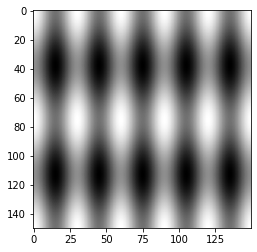

In [35]:
from scipy.fftpack import fft2

N = 150
freq_r = 2./N
freq_c = 5./N
Z = np.zeros((N, N))

for row in range(N):
  for col in range(N):
    Z[row, col] = 4 * np.cos(2*np.pi*freq_r*row) + 5*np.cos(2*np.pi*freq_c*col)


plt.imshow(Z, 'gray')

(-0.1, 0.1)

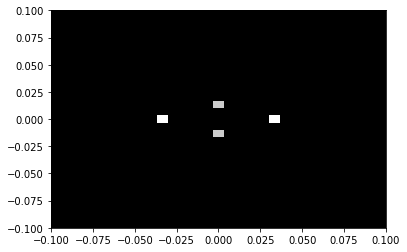

In [38]:
FZ = fft2(Z)

freqs = fftfreq(N, 1)
FZ = fftshift(FZ)
freqs = fftshift(freqs)
plt.pcolormesh(freqs, freqs, np.abs(FZ), cmap='gray')
plt.xlim((-0.1, 0.1))
plt.ylim((-0.1, 0.1))


In [39]:
def fourier_and_plot(img):
  
  num_rows, num_cols = img.shape
  Fimg = fft2(img)
  freq_r = fftfreq(num_rows)
  freq_c = fftfreq(num_cols)
  
  Fimg = fftshift(Fimg)
  freq_c = fftshift(freq_c)
  freq_r = fftshift(freq_r)
  
  plt.figure()
  plt.pcolormesh(freq_c, freq_r, np.log(np.abs(Fimg)), cmap='gray')
  

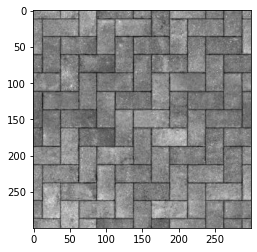

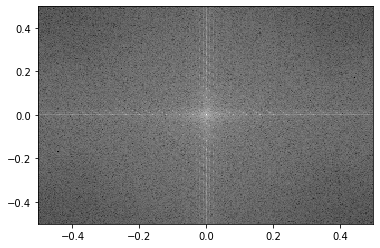

In [41]:
img = plt.imread('Imgs/tiles1.tiff')
plt.imshow(img, 'gray')
fourier_and_plot(img)

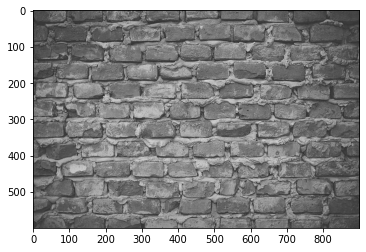

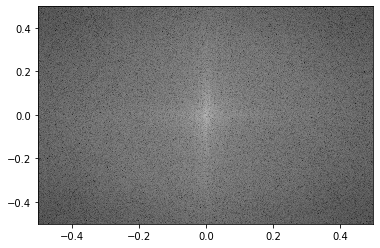

In [42]:
img = plt.imread('Imgs/tiles2.tiff')
plt.imshow(img, 'gray')
fourier_and_plot(img)

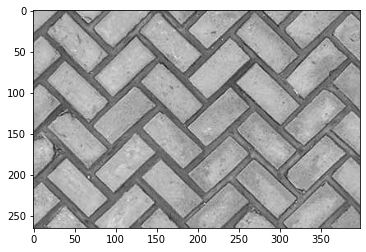

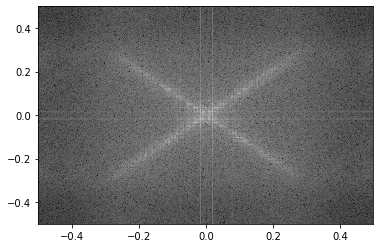

In [44]:
img = plt.imread('Imgs/tiles3.tiff')
plt.imshow(img, 'gray')
fourier_and_plot(img)

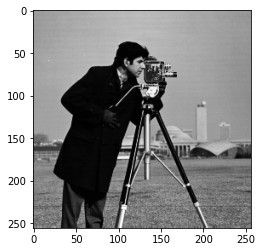

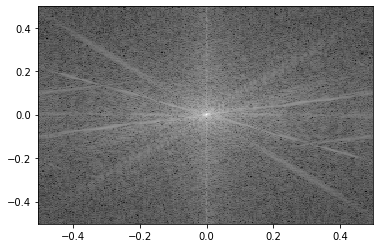

In [45]:
img = plt.imread('Imgs/cameraman.tiff')
plt.imshow(img, 'gray')
fourier_and_plot(img)